In [1]:
import pandas as pd 
import os
import numpy as np
import pickle
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
libdir = '../data/lib/'
libname = 'human.faims.fixed.download.sample.130941.RefEntrapment.psps23.RefDecoy.psps13.pkl'
with open(os.path.join(libdir,libname),'rb')as f:
    library = pickle.load(f)
for key in tqdm(library.keys()):
    library[key]['Species'] = 'HUMAN'

100%|██████████| 523764/523764 [00:00<00:00, 2697381.16it/s]


In [3]:
dirname = '../result/'
filenames_A = [
    'CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file2_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_02_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file3_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_03_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_04_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_05_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_06_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
]
filenames_B = [
    'CsoDIAq-file7_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_07_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file8_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_08_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file9_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_09_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file10_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_10_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file11_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_11_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file12_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_12_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
]

In [4]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'

In [5]:
total_A = pd.DataFrame([])
for i in range(len(filenames_A)):
    df = pd.read_csv(os.path.join(dirname,filenames_A[i]))
    df['Precursor'] = df[['peptide','charge']].apply(lambda x:x['peptide']+'_'+str(x['charge']),axis=1)
    df['protein'] = df['peptide'].apply(peptide_type)
    df = df[df['protein']=='SAMPLE']
    df = df[df['Coeff']>0]
    df['A'+str(i+1)] = df['Coeff']
    df = df[['Precursor','A'+str(i+1)]]
    if i==0:
        total_A = pd.concat([total_A,df])
    else:
        total_A = total_A.join(df.set_index('Precursor'),on='Precursor',how='outer')

In [6]:
total_B = pd.DataFrame([])
for i in range(len(filenames_B)):
    df = pd.read_csv(os.path.join(dirname,filenames_B[i]))
    df['Precursor'] = df[['peptide','charge']].apply(lambda x:x['peptide']+'_'+str(x['charge']),axis=1)
    df['protein'] = df['peptide'].apply(peptide_type)
    df = df[df['protein']=='SAMPLE']
    df = df[df['Coeff']>0]
    df['B'+str(i+1)] = df['Coeff']
    df = df[['Precursor','B'+str(i+1)]]
    if i==0:
        total_B = pd.concat([total_B,df])
    else:
        total_B = total_B.join(df.set_index('Precursor'),on='Precursor',how='outer')

In [7]:
total = pd.DataFrame([])
total = total_A.join(total_B.set_index('Precursor'),on='Precursor',how='outer')

In [8]:
total['num_of_nan'] = total.T.isna().sum()
total = total[total['num_of_nan']<=2]

In [9]:
total

,Precursor,A1,A2,A3,A4,A5,A6,B1,B2,B3,B4,B5,B6,num_of_nan
0.0,LC+57.0215YVALDFEQEMATAASSSSLEK_3,10882.038782,751407.380835,7.971350e+05,539549.146816,742015.809052,758895.806419,7.528704e+05,7.428418e+05,7.220969e+05,700731.146769,733468.499521,761808.464493,0
1.0,AMGIMNSFVNDIFER_2,39626.787654,830820.363341,1.556313e+06,40621.581429,831596.306929,31556.151570,8.115562e+05,1.395035e+04,5.244907e+04,47839.646799,735870.750266,9624.736874,0
2.0,LQAEIEGLK_2,17944.556429,186227.280631,1.121469e+06,66337.261115,317670.112329,348993.886506,1.169061e+06,1.049486e+06,1.925197e+06,179209.514769,218018.930180,83929.808640,0
3.0,TLQC+57.0215LFEK_2,24573.878864,93315.063544,2.196850e+05,98385.979260,110609.597301,208121.223524,1.159165e+05,2.147194e+05,1.181359e+05,145702.622523,143020.718833,NaN,1
4.0,QVDQLTNDK_2,85469.141226,356449.134529,4.103216e+05,323348.804389,346856.118093,374793.384022,1.700049e+05,3.681739e+05,3.813561e+05,375489.428740,325244.896644,364421.730467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,HENIIGINDIIR_2,NaN,NaN,2.336741e+04,17036.626097,12161.195865,30124.202550,1.926121e+04,2.172625e+04,1.847347e+04,22690.934517,18512.828465,23699.286684,2
NaN,QLSQSLLPAIVELAEDAK_3,NaN,NaN,4.275770e+04,27880.675574,39075.137164,25000.604237,2.963269e+04,3.276371e+04,3.364343e+04,29495.056866,27033.198460,36930.612669,2
NaN,VPIILVGNK_2,NaN,NaN,1.353397e+04,34067.069227,17506.028991,28823.879528,2.167272e+04,3.568590e+04,3.437497e+04,36826.985323,36430.845231,38473.199099,2
NaN,TGAEGAVLDEAK_2,NaN,NaN,9.871853e+04,75166.212388,69659.135279,84284.378464,6.580030e+04,8.092615e+04,8.117214e+04,86075.767955,94509.518996,76813.548783,2


In [10]:
def get_avg(x):
    coeffs = []
    for i in range(6):
        coeff = x['A'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    for i in range(6):
        coeff = x['B'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)
def get_CV(x):
    coeffs = []
    for i in range(6):
        coeff = x['A'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    for i in range(6):
        coeff = x['B'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)

In [11]:
total['peptide'] = total['Precursor'].apply(lambda x:x.split('_')[0])
total_pep = total.groupby('peptide').sum().reset_index()
total_pep = total_pep.drop('num_of_nan',axis=1)

In [12]:
total_pep

,peptide,A1,A2,A3,A4,A5,A6,B1,B2,B3,B4,B5,B6
0,A+42.01057AAAAAAAAAGAAGGR,1.646629e+04,1.594080e+04,1.628500e+04,1.704893e+04,1.513666e+04,1.760499e+04,2.089316e+04,1.678858e+04,1.747261e+04,2.113921e+04,1.617293e+04,1.669595e+04
1,A+42.01057AAAAAGAASGLPGPVAQGLK,2.953814e+04,2.719877e+04,2.241694e+04,2.883786e+04,2.968086e+04,2.913593e+04,2.791571e+04,2.982735e+04,2.562131e+04,2.732199e+04,3.068724e+04,2.762568e+04
2,A+42.01057AAAAAGAGPEMVR,4.286697e+04,4.428778e+04,3.947205e+04,3.890238e+04,3.765314e+04,3.680080e+04,4.436921e+04,3.565843e+04,3.586536e+04,4.150675e+04,3.761554e+04,3.799499e+04
3,A+42.01057AAAAGTATSQR,2.872803e+04,2.761016e+04,3.001465e+04,3.038440e+04,2.745447e+04,2.586803e+04,2.651323e+04,2.466030e+04,2.611065e+04,2.578310e+04,2.293918e+04,2.575484e+04
4,A+42.01057AAAVVEFQR,3.553571e+04,2.980106e+04,2.744976e+04,2.453563e+04,3.098059e+04,3.387488e+04,3.308699e+04,3.317049e+04,2.757002e+04,3.153870e+04,2.901636e+04,2.563020e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5305,YVWLVYEQDRPLK,5.123152e+04,5.321142e+04,5.368232e+04,4.825449e+04,4.345776e+04,5.046409e+04,5.253302e+04,4.794439e+04,5.129454e+04,5.147220e+04,5.156158e+04,5.104261e+04
5306,YWLC+57.0215AATGPSIK,2.506573e+04,4.181546e+04,4.449439e+04,3.401458e+04,4.132301e+04,4.434044e+04,4.178468e+04,3.873847e+04,3.665105e+04,4.214257e+04,3.760099e+04,3.908931e+04
5307,YYPTEDVPR,3.025042e+05,3.281380e+05,3.178362e+05,3.580814e+05,3.464588e+05,3.365175e+05,3.618249e+05,3.563606e+05,4.099834e+05,1.807598e+05,3.812614e+05,3.876361e+05
5308,YYTSASGDEMVSLK,1.405984e+05,1.435146e+05,1.244122e+05,1.626328e+05,1.240811e+05,1.446110e+05,1.409084e+05,1.650033e+05,1.477852e+05,1.465441e+05,1.589471e+05,1.325224e+05


In [13]:
total['avg'] = total[['A1','A2','A3','A4','A5','A6','B1','B2','B3','B4','B5','B6']].apply(get_avg,axis=1)
total['CV'] = total[['A1','A2','A3','A4','A5','A6','B1','B2','B3','B4','B5','B6']].apply(get_CV,axis=1)
old_len = len(total)

In [14]:
total

,Precursor,A1,A2,A3,A4,A5,A6,B1,B2,B3,B4,B5,B6,num_of_nan,peptide,avg,CV
0.0,LC+57.0215YVALDFEQEMATAASSSSLEK_3,10882.038782,751407.380835,7.971350e+05,539549.146816,742015.809052,758895.806419,7.528704e+05,7.428418e+05,7.220969e+05,700731.146769,733468.499521,761808.464493,0,LC+57.0215YVALDFEQEMATAASSSSLEK,667808.533684,0.310384
1.0,AMGIMNSFVNDIFER_2,39626.787654,830820.363341,1.556313e+06,40621.581429,831596.306929,31556.151570,8.115562e+05,1.395035e+04,5.244907e+04,47839.646799,735870.750266,9624.736874,0,AMGIMNSFVNDIFER,416818.718629,1.185230
2.0,LQAEIEGLK_2,17944.556429,186227.280631,1.121469e+06,66337.261115,317670.112329,348993.886506,1.169061e+06,1.049486e+06,1.925197e+06,179209.514769,218018.930180,83929.808640,0,LQAEIEGLK,556962.028492,1.044162
3.0,TLQC+57.0215LFEK_2,24573.878864,93315.063544,2.196850e+05,98385.979260,110609.597301,208121.223524,1.159165e+05,2.147194e+05,1.181359e+05,145702.622523,143020.718833,NaN,1,TLQC+57.0215LFEK,135653.265034,0.419154
4.0,QVDQLTNDK_2,85469.141226,356449.134529,4.103216e+05,323348.804389,346856.118093,374793.384022,1.700049e+05,3.681739e+05,3.813561e+05,375489.428740,325244.896644,364421.730467,0,QVDQLTNDK,323494.084525,0.284640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,HENIIGINDIIR_2,NaN,NaN,2.336741e+04,17036.626097,12161.195865,30124.202550,1.926121e+04,2.172625e+04,1.847347e+04,22690.934517,18512.828465,23699.286684,2,HENIIGINDIIR,20705.341792,0.220312
NaN,QLSQSLLPAIVELAEDAK_3,NaN,NaN,4.275770e+04,27880.675574,39075.137164,25000.604237,2.963269e+04,3.276371e+04,3.364343e+04,29495.056866,27033.198460,36930.612669,2,QLSQSLLPAIVELAEDAK,32421.282266,0.167274
NaN,VPIILVGNK_2,NaN,NaN,1.353397e+04,34067.069227,17506.028991,28823.879528,2.167272e+04,3.568590e+04,3.437497e+04,36826.985323,36430.845231,38473.199099,2,VPIILVGNK,29739.557138,0.286318
NaN,TGAEGAVLDEAK_2,NaN,NaN,9.871853e+04,75166.212388,69659.135279,84284.378464,6.580030e+04,8.092615e+04,8.117214e+04,86075.767955,94509.518996,76813.548783,2,TGAEGAVLDEAK,81312.568710,0.119443


In [15]:
total['Log'] = np.log10(list(total['avg']))
total['good_cv'] = total['CV'].apply(lambda x:1 if x<=0.2 else 0)

In [16]:
log2 = total[['Log','good_cv']].values
ascending = np.argsort(log2[:,0])
new_log2 = log2[ascending[::-1]]

In [17]:
rank_good = []
rank_bad = []
good = []
bad = []
for i in range(len(new_log2)):
    if new_log2[i][1]==1:
        good.append(new_log2[i][0])
        rank_good.append(i)
    else:
        bad.append(new_log2[i][0])
        rank_bad.append(i)        

In [18]:
# good = total[total['CV']<=0.2]
# bad = total[total['CV']>0.2]
# good_quant = good['Log'].values
# bad_quant = bad['Log'].values
# rank_good = np.sort(good_quant)[::-1]
# rank_bad = np.sort(bad_quant)[::-1]

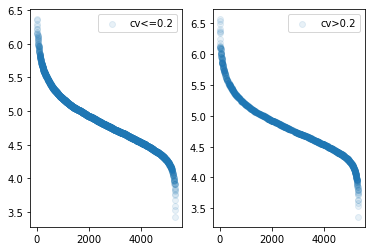

In [19]:
fig,axs = plt.subplots(1,2)
axs[0].scatter(rank_good,good,alpha=0.1,label='cv<=0.2')
axs[0].legend()
axs[1].scatter(rank_bad,bad,alpha=0.1,label='cv>0.2')
axs[1].legend()
# plt.title('at least 10 IDs in 12 replicates')
# plt.legend()
plt.show()

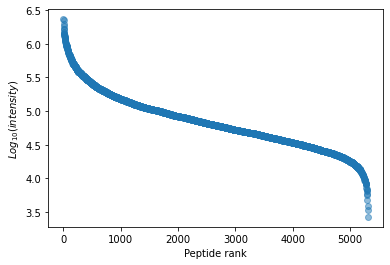

In [20]:
#plt.scatter(rank_bad,bad,alpha=0.5,label='cv>0.2')
plt.scatter(rank_good,good,alpha=0.5,label='cv<=0.2')
plt.xlabel('Peptide rank')
plt.ylabel('$Log_{10}(intensity)$')
#plt.title('At least 10 IDs in 12 replicates')
#plt.legend()
# plt.show()
plt.savefig('supplement7.jpg',dpi=400)   